In [1]:
# Importing standard Qiskit libralies
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution

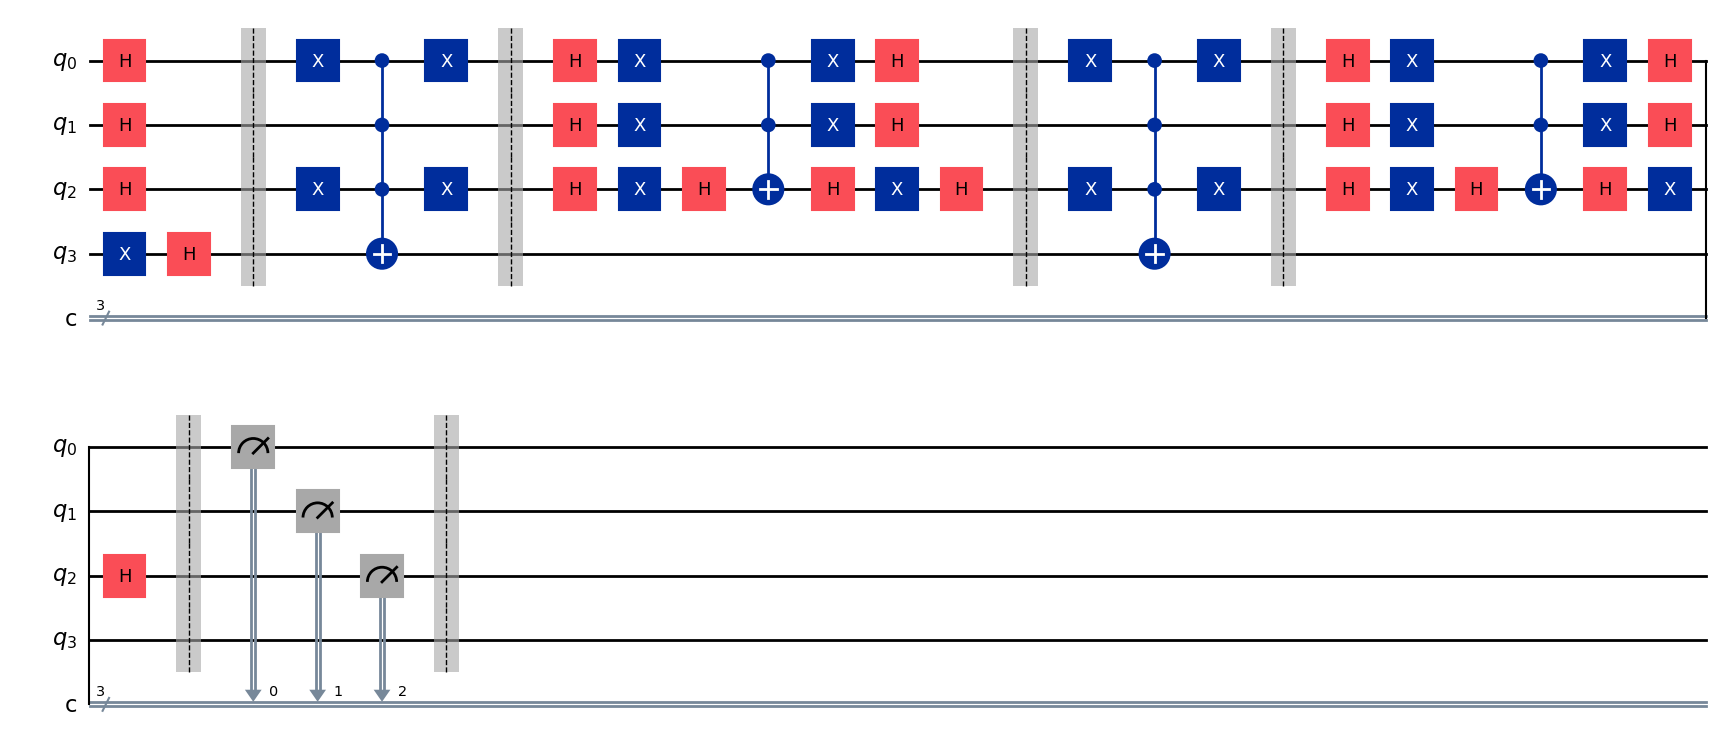

In [2]:
# オラクル
def oracle(circuit):
    circuit.x([0,2])
    circuit.mcx([0,1,2],3)
    circuit.x([0,2])
    circuit.barrier()
    
# 量子回路の初期化
circuit = QuantumCircuit(4,3)

# ステップ1 重ね合わせ状態を作成
circuit.x(3)
circuit.h([0,1,2,3])
circuit.barrier()
for _ in range(2):
    # ステップ2 選択的回転
    oracle(circuit)

    # ステップ3 拡散変換
    circuit.h([0,1,2])
    circuit.x([0,1,2])
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    circuit.x([0,1,2])
    circuit.h([0,1,2])
    circuit.barrier()

# 測定
circuit.measure([0,1,2],[0,1,2])
circuit.barrier()

circuit.draw("mpl")

{'010': 950, '011': 9, '111': 10, '110': 7, '001': 6, '000': 6, '101': 7, '100': 5}


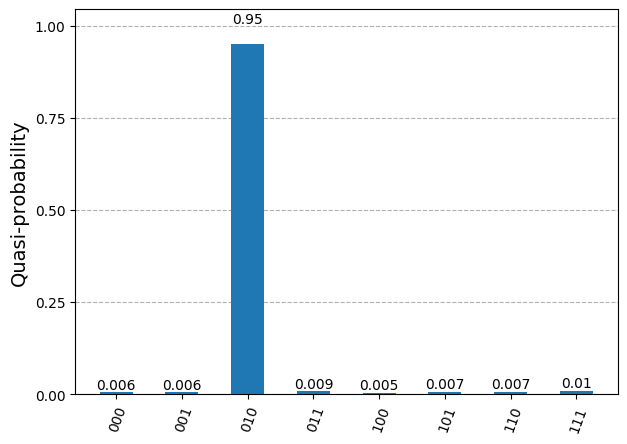

In [3]:
# 実行と結果取得
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(circuit)

sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1000)
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)
plot_distribution(counts)